<a href="https://colab.research.google.com/github/Huynh-Truong-75/Project-CNN/blob/main/Face_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**link data train https://drive.google.com/drive/folders/1DgQM5a9jeluOGVY1QQn8ngKFZyrDMZby?usp=sharing**

In [3]:
import matplotlib.pyplot            as plt
from matplotlib.image               import imread
from os                             import listdir
from numpy                          import asarray
from numpy                          import save
from tensorflow.keras.utils         import load_img, img_to_array
from keras.models                   import Sequential
from keras.layers                   import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot            as plt
from tensorflow.keras.utils         import load_img, img_to_array
from tensorflow.keras.optimizers    import SGD
import numpy                        as np


**Tạo Data Train**

In [4]:
imgs, labels = list(), list()
Tho = '/content/drive/MyDrive/face_train/Tho/'
Truong = '/content/drive/MyDrive/face_train/Truong/'
Tuan = '/content/drive/MyDrive/face_train/Tuan/'


def face_train(path, output, face):
  for file in listdir(path):
    if file.startswith(face):
      img = load_img(path+file,target_size=(150,150))
      img = img_to_array(img)
      imgs.append(img)
      labels.append(output)

face_train(Tho, 0, 'tho')
face_train(Truong, 1, 'truong')
face_train(Tuan, 2, 'tuan')

In [5]:
imgs = asarray(imgs)
labels = asarray(labels)
print(imgs.shape,labels.shape)

save('face_imgs.npy', imgs)
save('face_labels.npy', labels)

(59, 150, 150, 3) (59,)


In [6]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(150,150,3), padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2), padding = 'same'))

model.add(Flatten())
model.add(Dense(512, activation='relu')) 
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 128)      0

In [7]:
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(imgs, labels, batch_size=64,epochs=50, verbose=2)
model.save('face.h5')

Epoch 1/50
1/1 - 10s - loss: 6.5276 - accuracy: 0.3390 - 10s/epoch - 10s/step
Epoch 2/50
1/1 - 0s - loss: 335.2426 - accuracy: 0.3220 - 59ms/epoch - 59ms/step
Epoch 3/50
1/1 - 0s - loss: 145.1428 - accuracy: 0.3390 - 60ms/epoch - 60ms/step
Epoch 4/50
1/1 - 0s - loss: 22.5773 - accuracy: 0.3390 - 58ms/epoch - 58ms/step
Epoch 5/50
1/1 - 0s - loss: 7.7748 - accuracy: 0.3220 - 58ms/epoch - 58ms/step
Epoch 6/50
1/1 - 0s - loss: 6.0165 - accuracy: 0.3220 - 59ms/epoch - 59ms/step
Epoch 7/50
1/1 - 0s - loss: 0.7454 - accuracy: 0.6610 - 57ms/epoch - 57ms/step
Epoch 8/50
1/1 - 0s - loss: 1.9459 - accuracy: 0.3390 - 59ms/epoch - 59ms/step
Epoch 9/50
1/1 - 0s - loss: 1.0340 - accuracy: 0.6610 - 56ms/epoch - 56ms/step
Epoch 10/50
1/1 - 0s - loss: 0.4741 - accuracy: 1.0000 - 57ms/epoch - 57ms/step
Epoch 11/50
1/1 - 0s - loss: 0.2552 - accuracy: 1.0000 - 57ms/epoch - 57ms/step
Epoch 12/50
1/1 - 0s - loss: 0.1589 - accuracy: 1.0000 - 57ms/epoch - 57ms/step
Epoch 13/50
1/1 - 0s - loss: 0.0396 - accurac

1/1 [==============================] - 0s 20ms/step
Truong


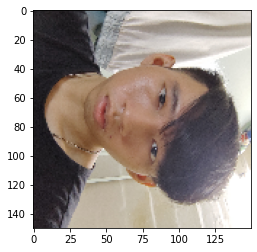

In [10]:
def prediction(face):
  classes = ["Tho","Truong","Tuan"]

  img = load_img(face, target_size=(150,150))
  plt.imshow(img)

  imgRe = img_to_array(img)
  imgRe = imgRe.reshape(1,150,150,3)  
  imgRe = imgRe.astype('float32')
  imgRe /= 255

  x = int(np.argmax(model.predict(imgRe), axis=1))
  print(classes[x])

prediction('/content/drive/MyDrive/predict/face_predict/truong1.jpg')

1/1 [==============================] - 0s 18ms/step
Tho


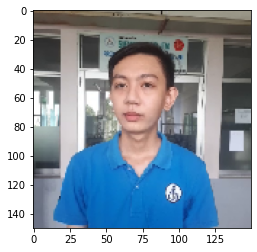

In [14]:
prediction('/content/drive/MyDrive/predict/face_predict/tho1.jpg')